<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM2/random/DecPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Shiladitya (2348556)

##The first part of this notebook deals with a counterexample as to why PCA is not applicable on categorical data.

*An explanation of why PCA failes on categorical data -*

**Scale and Measurement:** PCA relies on the variance-covariance matrix, which assumes that the variables are measured on a continuous scale. Categorical variables, on the other hand, represent categories or labels and do not have a meaningful numerical scale. Applying PCA to categorical variables can lead to misinterpretation of results.

**Euclidean Distance:** PCA is based on the Euclidean distance between data points. For numerical variables, this distance makes sense, as it reflects the geometric distance in the space defined by the variables. However, for categorical variables, there is no meaningful concept of distance between categories.

**Orthogonality Assumption:** PCA assumes orthogonality between principal components, meaning that they are uncorrelated. This assumption breaks down when dealing with categorical variables, as they may exhibit dependencies or relationships that are not captured by linear correlations.

**Meaning of Principal Components:** In PCA, the principal components are linear combinations of the original variables. Interpreting these linear combinations becomes challenging when dealing with categorical variables, as there is no natural order or arithmetic meaning to the categories.

###Observe

In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import mpl_toolkits.mplot3d

In [399]:
df = pd.read_csv('/content/drive/MyDrive/ipynb/sem2/datasets/car_evaluation.csv',\
                 header=None)
df.columns =['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [400]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [401]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
df = encoder.fit_transform(df)

In [402]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,unacc
1,1,1,1,1,1,2,unacc
2,1,1,1,1,1,3,unacc
3,1,1,1,1,2,1,unacc
4,1,1,1,1,2,2,unacc
...,...,...,...,...,...,...,...
1723,4,4,4,3,2,2,good
1724,4,4,4,3,2,3,vgood
1725,4,4,4,3,3,1,unacc
1726,4,4,4,3,3,2,good


In [403]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,1.750000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000
75%,3.250000,3.250000,3.250000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000


In [404]:
x = df.drop(['class'], axis=1)
y = df['class']

In [405]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [406]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [407]:
y_pred = model.predict(x_test)

In [408]:
print(f'Model accuracy score: {accuracy_score(y_test, y_pred)*100:.1f}%')

Model accuracy score: 80.2%


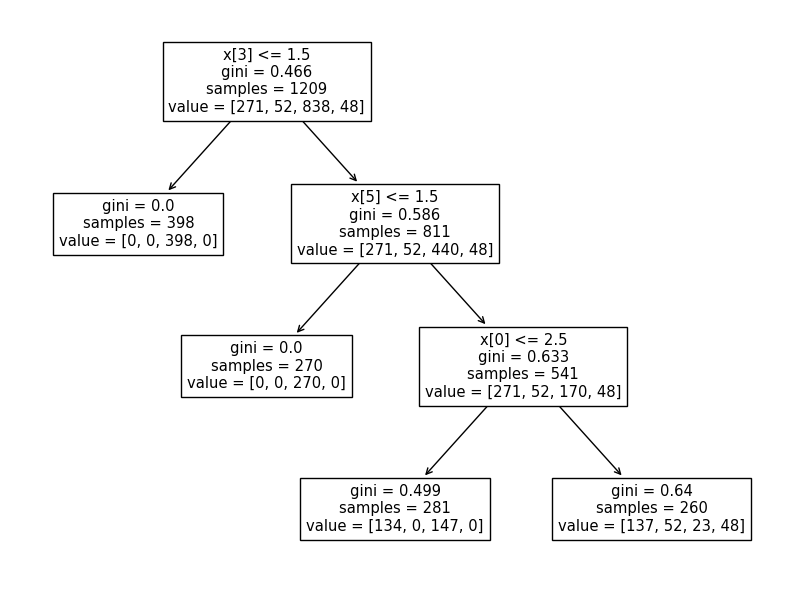

In [409]:
pt.figure(figsize=(8,6))
tree.plot_tree(model.fit(x_train, y_train))
pt.tight_layout();

In [410]:
x = StandardScaler().fit_transform(x)

In [411]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(x)
pcdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])

In [412]:
pcdf = pd.concat([pcdf, y], axis = 1)

In [413]:
pcdf

,pc1,pc2,class
0,-1.727014,-0.325616,unacc
1,-1.172635,0.718884,unacc
2,-0.618256,1.763383,unacc
3,-1.702656,-0.515843,unacc
4,-1.148277,0.528657,unacc
...,...,...,...
1723,1.148277,-0.528657,good
1724,1.702656,0.515843,vgood
1725,0.618256,-1.763383,unacc
1726,1.172635,-0.718884,good


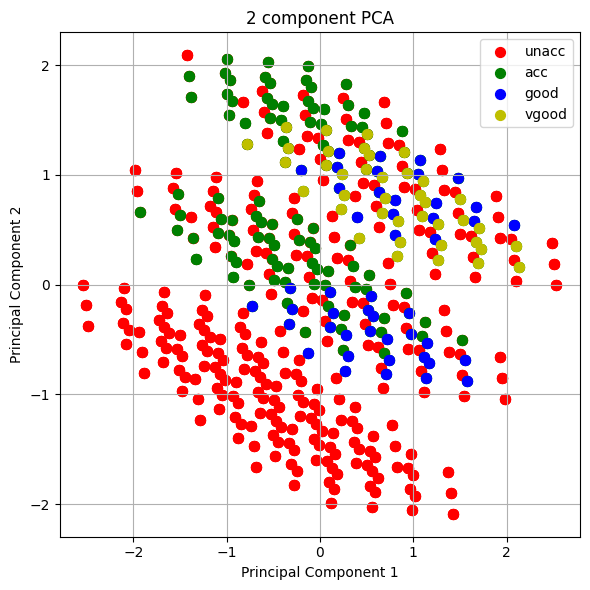

In [414]:
fig = pt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')

targets = ['unacc', 'acc', 'good', 'vgood']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
  when = pcdf['class'] == target
  ax.scatter(pcdf.loc[when, 'pc1'],pcdf.loc[when, 'pc2'],c = color,s = 50)
ax.legend(targets)
ax.grid()
pt.tight_layout();

In [415]:
encoder = ce.OrdinalEncoder(cols=['class'])
pcdf = encoder.fit_transform(pcdf)

In [416]:
x = pcdf.drop(['class'], axis=1)
y = pcdf['class']

In [417]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [418]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [419]:
y_pred = model.predict(x_test)

In [420]:
print(f'Model accuracy score: {accuracy_score(y_test, y_pred)*100:.1f}%')

Model accuracy score: 71.3%


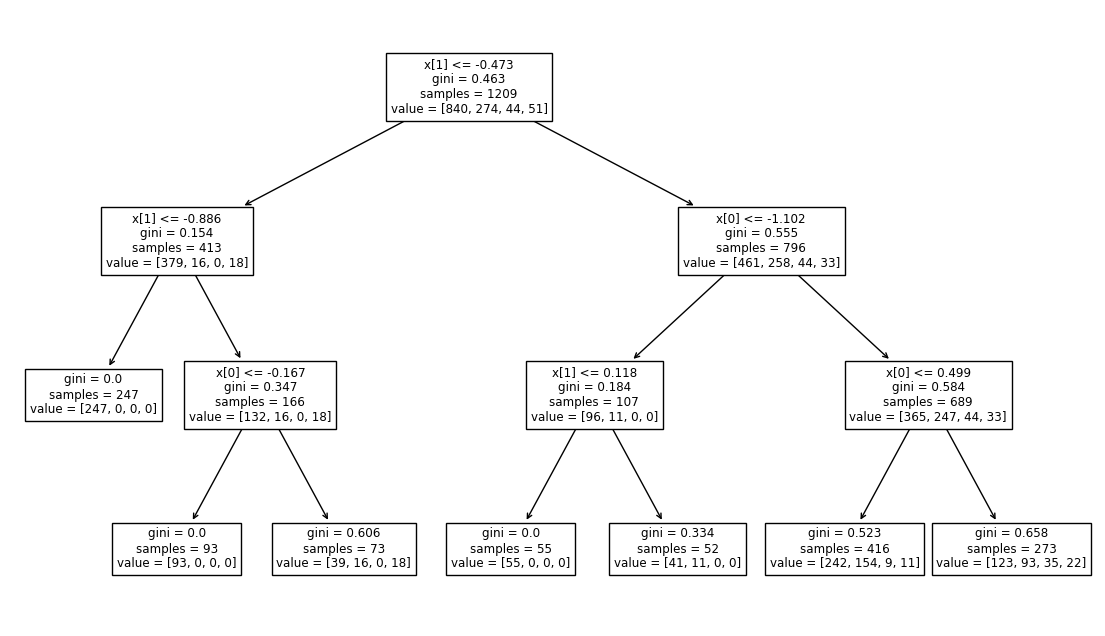

In [421]:
pt.figure(figsize=(14,8))
tree.plot_tree(model.fit(x_train, y_train));

##The second part of the notebook explores how the accuracy of Decision Tree model changes after applying PCA from what it was before.
*We have used the iris dataset in this exploration.*
###Observe

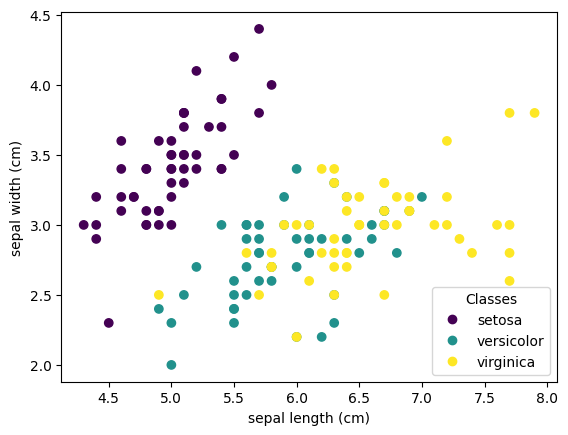

In [422]:
df = datasets.load_iris()
fig, ax = pt.subplots()
scatter = ax.scatter(df.data[:, 0], df.data[:, 1], c=df.target)
ax.set(xlabel=df.feature_names[0], ylabel=df.feature_names[1])
fig = ax.legend(scatter.legend_elements()[0], df.target_names, loc="lower right", title="Classes")

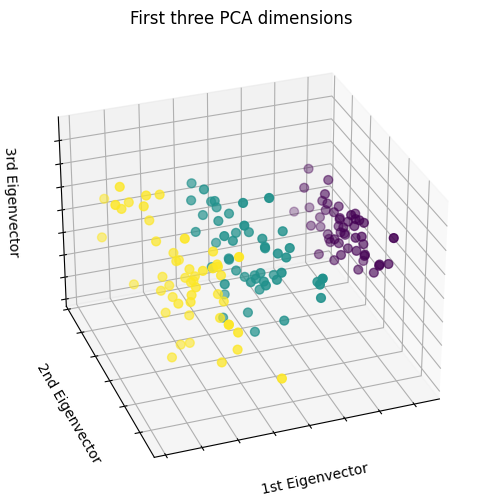

In [423]:
fig = pt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
x_reduced = PCA(n_components=3).fit_transform(df.data)
ax.scatter(x_reduced[:, 0],x_reduced[:, 1],x_reduced[:, 2],c=df.target,s=40,)
ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])
pt.show();

In [424]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [425]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

In [426]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [427]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

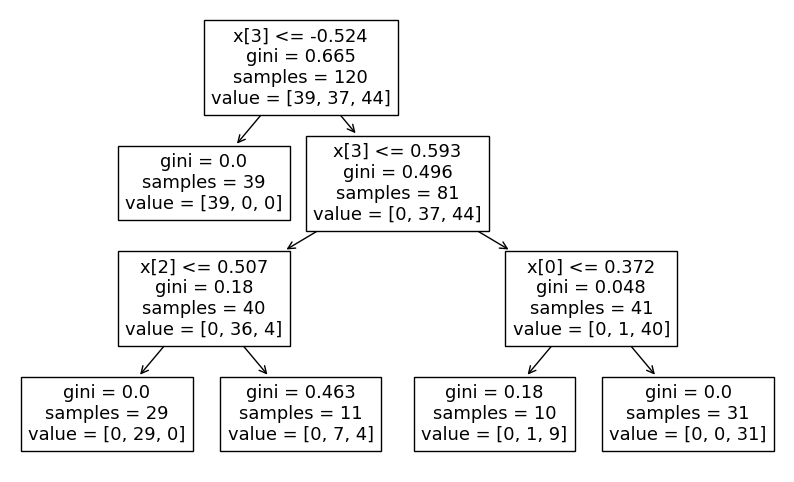

In [428]:
pt.figure(figsize=(10,6))
tree.plot_tree(model.fit(x_train, y_train));

In [429]:
y_pred = model.predict(x_test)

In [430]:
print(f'Model accuracy score: {accuracy_score(y_test, y_pred)*100:.1f}%')

Model accuracy score: 96.7%


In [431]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pdf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [432]:
df = pd.concat([pdf, df[['target']]], axis=1)

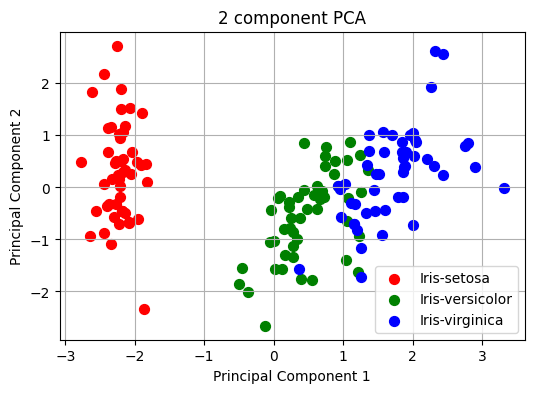

In [433]:
fig = pt.figure(figsize = (6,4))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    ax.scatter(df.loc[indicesToKeep, 'pc1']
               , df.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid();

In [434]:
df

,pc1,pc2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


In [435]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [436]:
x = df.drop(['target'],axis=1)
y = df['target']

In [437]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [438]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

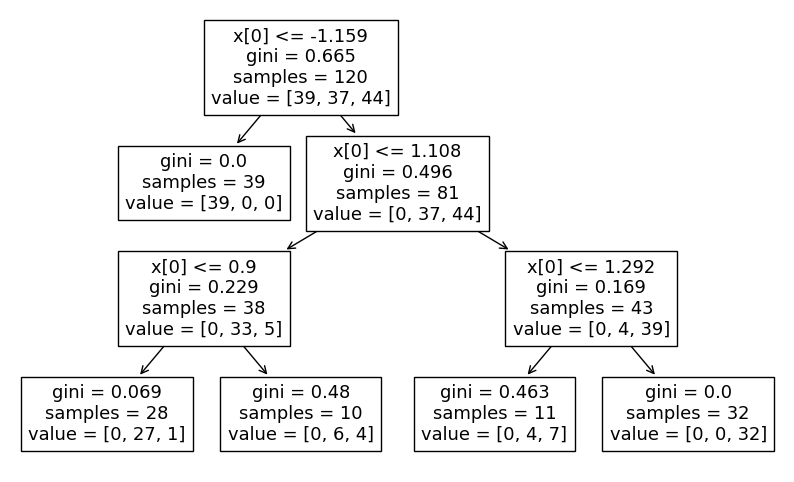

In [439]:
pt.figure(figsize=(10,6))
tree.plot_tree(model.fit(x_train, y_train));

In [440]:
y_pred = model.predict(x_test)

In [441]:
print(f'Model accuracy score: {accuracy_score(y_test, y_pred)*100:.1f}%')

Model accuracy score: 96.7%


##Inference:
Thus we see that the same accuracy can be achieved with just two principal components (which is a linear algebraic combination of the others) of the rather than 4. This is the power of principal component analysis. We choose those components which explains the maximum variance. This is particularly useful when dealing with very large dimensions. Dimensionality reduction not only reduces the complexity of the model but also reduces running time considerably. And PCA is one of the most powerful method in this regard.
